In [1]:
import numpy as np
import matplotlib.pyplot as plt
import temp
from pydae import ssa
from pydae.bmapu.lines import change_line

In [2]:
Tfast = 50e-6
Ts_Control = 50e-6
#LPF power
fc= 30
# Filter parameter
Lt=2.5e-3
Rt=.1
Ls=Lt
Rs=Rt
Rd = 27
C = 1e-6

# Switching frequency
fs = 10e3
#dead time
dt = 0.1e-6

# PI current controller gains
tau_c = 1e-3
L = Ls + Lt
R = Rs + Rt
Kp_i = L/tau_c
Ki_i = R/tau_c

#Ton contactor
T_on_contactor = 0.1

#VSG
S_b = 20e3
U_b = 400
I_b = S_b/(np.sqrt(3)*U_b)
Z_b = U_b**2/S_b
I_bdq = I_b*np.sqrt(2)
U_bdq = U_b*(np.sqrt(2/3))

H = 2.5 # desired virtual inertia 
Kp_p = 0.01 # active power proportinal gain
Ki_p = 1.0/(2.0*H) #proportional gain active power control loop
Kp_q = 0.1
Ki_q = 10.0
Xv = 0.1
Rv = 0.0
e_o = 0.8
omega_base = 1.0

#LPF VSG
tau_vsg = 2.4e-3

# Swing equation
D_1 = 0.0;
D_2 =50.0;
Omega_d = 10.0;

K_pv = 5.0;
K_iv =200.0;

T_pf = 0.02;
T_qf = 0.02;
T_vf = 0.02;

X_v = 2*np.pi*50*(Ls+Lt)/Z_b
R_v = (Rs+Rt)/Z_b

In [3]:
model = temp.model()
params = {'H_1':2.5,'D_1_1':0,'D_2_1':50,'Omega_d_1':10,'X_v_1':X_v,'R_v_1':R_v,'K_pv_1':K_pv,'K_iv_1':K_iv} 
change_line(model, '1', '2',X = X_v/2/3,R = 0)
model.ini(params,'xy_0.json')

model.report_x()
model.report_y()


delta_v_1 =  0.00
Domega_m_1 =  0.00
x_d2_1 =  0.00
xi_v_1 =  0.00
delta_2 =  0.00
Domega_2 =  0.00
Dv_2  =  0.00
xi_freq =  0.00
V_1   =  1.00
theta_1 =  0.00
V_2   =  1.00
theta_2 =  0.00
i_d_ref_1 =  0.00
i_q_ref_1 =  0.00
p_1   =  0.00
q_1   =  0.00
omega_2 =  1.00
omega_coi =  1.00
p_agc =  0.00


In [4]:
model.report_u()

P_1   = 0.00
Q_1   = 0.00
P_2   = 0.00
Q_2   = 0.00
p_l_1 = 0.00
q_l_1 = 0.00
p_r_1 = 0.00
q_r_1 = 0.00
v_ref_1 = 1.00
alpha_2 = 0.00
v_ref_2 = 1.00
omega_ref_2 = 1.00
delta_ref_2 = 0.00
phi_2 = 0.00
rocov_2 = 0.00


In [5]:
ssa.A_eval(model)
ssa.damp_report(model)

,Real,Imag,Freq.,Damp,Participation
Mode 1,-0.000001,0.000000,0.000000,1.00000,[xi_freq]
Mode 2,-3.124156,14.806762,2.356569,0.20645,"[delta_v_1, Domega_m_1]"
Mode 3,-3.124156,-14.806762,2.356569,0.20645,"[delta_v_1, Domega_m_1]"
Mode 4,-13.751988,0.000000,0.000000,1.00000,[x_d2_1]
Mode 5,0.018716,0.000000,0.000000,-1.00000,[xi_v_1]
Mode 6,-0.001000,0.000000,0.000000,1.00000,[delta_2]
Mode 7,-0.100000,0.000000,0.000000,1.00000,[Domega_2]
Mode 8,-0.000001,0.000000,0.000000,1.00000,[Dv_2]


In [6]:
data = np.genfromtxt('HIL_240905_184236.csv',delimiter=',')

FileNotFoundError: HIL_240905_184236.csv not found.

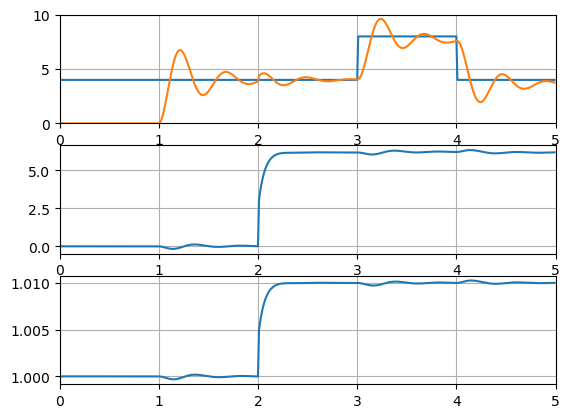

In [7]:
model = temp.model()
change_line(model, '1', '2', X_pu=X_v/2/3, R_pu=0.0, S_mva=0.02)
model.ini(params,'xy_0.json')
model.run(1,{})
model.run(2,{'p_l_1':0.2})
model.run(3,{'v_ref_1':1.01})
model.run(4,{'alpha_2':-0.02})
model.run(5,{'alpha_2': 0.0})
model.post();

fig,axes = plt.subplots(nrows=3)

axes[0].plot(model.Time,(-2*5*model.get_values('alpha_2')+0.2)*20)
axes[0].plot(model.Time,model.get_values('p_1')*20)
#axes[0].plot(data[:,0],data[:,1]/1000)

axes[1].plot(model.Time,model.get_values('q_1')*20)
axes[2].plot(model.Time,model.get_values('V_1'))

axes[0].set_ylim(0,10)
for ax in axes:
    ax.grid()
    ax.set_xlim([0,5])

In [8]:
400*np.sqrt(2/3)

326.5986323710904

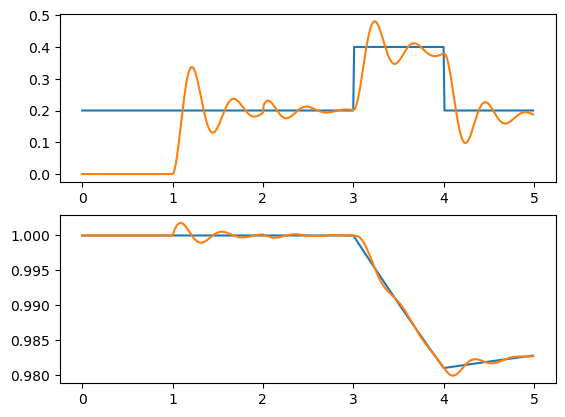

In [9]:
fig,axes = plt.subplots(nrows=2)

axes[0].plot(model.Time,-2*5*model.get_values('alpha_2')+0.2)
axes[0].plot(model.Time,model.get_values('p_1'))
axes[1].plot(model.Time,model.get_values('omega_coi'))
axes[1].plot(model.Time,model.get_values('omega_v_1'))